In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

In [41]:
df = pd.read_csv('Titanic-Dataset.csv')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
print(df.shape)
print(df.columns)
df.tail()

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [44]:
df.isna().values.any()

True

In [45]:
clean_df = df.dropna()

In [46]:
clean_df.isna().values.any()

False

In [47]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [48]:
df.Survived.value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

<BarContainer object of 2 artists>

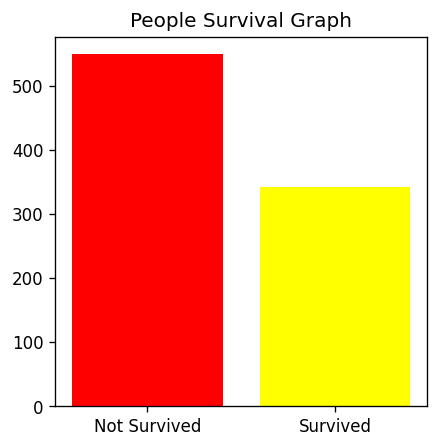

In [49]:
plt.figure(figsize=(4,4), dpi=120)
plt.title('People Survival Graph')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.bar(df.Survived.value_counts().keys(), df.Survived.value_counts(), color=['red','yellow'])


In [50]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

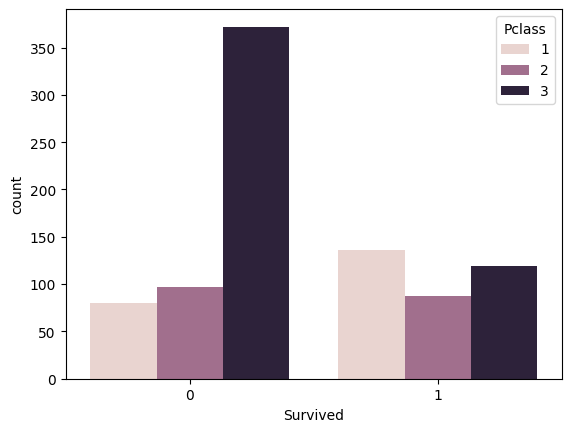

In [51]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])


In [52]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

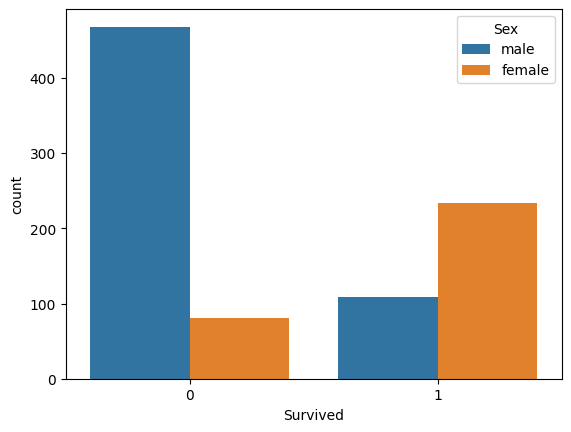

In [53]:
sns.countplot(x=df['Survived'], hue=df['Sex'])


In [54]:
df.replace({'Sex':{'male': 0, 'female':1 }},inplace=True)
df.head()

C:\Users\ragha\AppData\Local\Temp\ipykernel_9956\3502506846.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male': 0, 'female':1 }},inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [55]:
X = df[['Pclass', 'Sex']]
Y = df[['Survived']]
X , Y

(     Pclass  Sex
 0         3    0
 1         1    1
 2         3    1
 3         1    1
 4         3    0
 ..      ...  ...
 886       2    0
 887       1    1
 888       3    1
 889       1    0
 890       3    0
 
 [891 rows x 2 columns],
      Survived
 0           0
 1           1
 2           1
 3           1
 4           0
 ..        ...
 886         0
 887         1
 888         0
 889         1
 890         0
 
 [891 rows x 1 columns])

In [57]:
from sklearn.model_selection import train_test_split
X_train , X_test,Y_train,Y_test= train_test_split(X,Y,test_size= 0.2,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,Y_train)

c:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
X_test_pred = lg.predict(X_test)
print(X_test_pred)
X_train_pred = lg.predict(X_train)


[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [60]:
print(Y_test)

     Survived
495         0
648         0
278         0
31          1
255         1
..        ...
780         1
837         0
215         1
833         0
372         0

[179 rows x 1 columns]


In [64]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(X_train_pred, Y_train)
test_acc = accuracy_score(X_test_pred,Y_test)
print("TEST and TRAIN Accuracy are", test_acc, 'and', train_acc, 'respectfully.' )

TEST and TRAIN Accuracy are 0.7877094972067039 and 0.7865168539325843 respectfully.
